## Teste Técnico Bemol - Assistente Administrativo
### Base de dados 1
Adham Lucas da Silva Oliveira


In [35]:
## Reservado para a importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
import numpy as np

In [106]:
#Leitura do dataset 2
dataset = pd.read_csv('/home/adham/projects/teste-tecnico-bemol/dataset/Desafio - Relatório - Ass de Projetos - Dados - Questão 1.csv')
dataset.sort_values(['data_compra'])

,num_compra,usuario,nome,dados,Filial,data_compra,valor_compra,Imposto,Informado sobre imposto?
4443,24691233,520681,Matheus,12,Loja Manoa,2019-01-01 10:00:12,R$512.58,R$10.34,Sim
8389,24691003,686049,DANIELLY,12,Loja Manoa,2019-01-01 10:01:08,R$63.60,R$1.28,Sim
10627,24975606,861867,Gabriela,12,Loja Manoa,2019-01-01 10:01:44,R$108.32,R$2.18,Sim
9950,24691743,796822,Thiago,12,Loja Manoa,2019-01-01 10:15:18,R$132.25,R$2.67,Sim
2083,24976454,227916,JOSE,12,Loja Manoa,2019-01-01 10:16:09,R$216.46,R$4.37,Sim
...,...,...,...,...,...,...,...,...,...
3337,24644965,412597,Pedro,12,Loja Armando Mendes,2019-06-30 9:26:09,R$4.79,R$0.10,Sim
6599,24645003,633975,Thaíla,12,Loja Cachoerinha,2019-06-30 9:27:00,R$25.51,R$0.51,Sim
9994,24645920,798346,Leslie,12,Loja Cachoerinha,2019-06-30 9:45:52,R$47.77,R$0.96,Sim
7128,24646205,649158,Leandro,12,Loja Manoa,2019-06-30 9:50:51,R$289.15,R$5.83,Sim


## Limpeza e análise básica de dados

### Tipo e quantidade de dados presentes

In [107]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   num_compra                12000 non-null  int64 
 1   usuario                   12000 non-null  int64 
 2   nome                      11989 non-null  object
 3   dados                     12000 non-null  int64 
 4   Filial                    12000 non-null  object
 5   data_compra               12000 non-null  object
 6   valor_compra              12000 non-null  object
 7   Imposto                   12000 non-null  object
 8   Informado sobre imposto?  12000 non-null  object
dtypes: int64(3), object(6)
memory usage: 843.9+ KB


In [108]:
dataset.head()

,num_compra,usuario,nome,dados,Filial,data_compra,valor_compra,Imposto,Informado sobre imposto?
0,24937847,295,Daniel,12,Loja Armando Mendes,2019-01-06 11:53:01,R$129.12,R$2.60,Sim
1,23600787,295,Daniel,12,Loja Manoa,2019-06-01 17:27:11,R$95.96,R$1.94,Sim
2,24298956,295,Daniel,12,Loja Manoa,2019-06-22 16:40:21,R$506.05,R$10.21,Sim
3,23802765,331,Alex,12,Loja Manoa,2019-06-11 20:10:43,R$586.20,R$11.82,Sim
4,22559356,331,Alex,12,Loja Manoa,2019-05-14 19:26:41,R$57.86,R$1.17,Sim


### Verificando existência de dados nulos

In [109]:
dataset.isnull().sum()

num_compra                   0
usuario                      0
nome                        11
dados                        0
Filial                       0
data_compra                  0
valor_compra                 0
Imposto                      0
Informado sobre imposto?     0
dtype: int64

### Removendo linhas com dados nulos

In [110]:
dataset = dataset.dropna()
dataset.isnull().sum()

num_compra                  0
usuario                     0
nome                        0
dados                       0
Filial                      0
data_compra                 0
valor_compra                0
Imposto                     0
Informado sobre imposto?    0
dtype: int64

** Normalizando a coluna de 'data_compra' para datetime sem o horário**

In [111]:
dataset['data_compra'] = pd.to_datetime(dataset['data_compra']).dt.normalize()
dataset.head(5)

,num_compra,usuario,nome,dados,Filial,data_compra,valor_compra,Imposto,Informado sobre imposto?
0,24937847,295,Daniel,12,Loja Armando Mendes,2019-01-06,R$129.12,R$2.60,Sim
1,23600787,295,Daniel,12,Loja Manoa,2019-06-01,R$95.96,R$1.94,Sim
2,24298956,295,Daniel,12,Loja Manoa,2019-06-22,R$506.05,R$10.21,Sim
3,23802765,331,Alex,12,Loja Manoa,2019-06-11,R$586.20,R$11.82,Sim
4,22559356,331,Alex,12,Loja Manoa,2019-05-14,R$57.86,R$1.17,Sim


**Removendo o 'R$' e ',' dos valores da coluna valor_compra para conversão no tipo float e para uso na análise**

In [112]:
dataset['valor_compra'] = dataset['valor_compra'].replace(to_replace ='R\$', value = '', regex = True)
dataset['valor_compra'] = dataset['valor_compra'].replace(to_replace =',', value = '', regex = True)
dataset['Imposto'] = dataset['Imposto'].replace(to_replace ='R\$', value = '', regex = True)
dataset['Imposto'] = dataset['Imposto'].replace(to_replace =',', value = '', regex = True)



In [113]:
dataset = dataset.astype({'valor_compra':'float64', 'Imposto':'float64'})

In [114]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11989 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   num_compra                11989 non-null  int64         
 1   usuario                   11989 non-null  int64         
 2   nome                      11989 non-null  object        
 3   dados                     11989 non-null  int64         
 4   Filial                    11989 non-null  object        
 5   data_compra               11989 non-null  datetime64[ns]
 6   valor_compra              11989 non-null  float64       
 7   Imposto                   11989 non-null  float64       
 8   Informado sobre imposto?  11989 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 936.6+ KB


## Analise dos dados

### Top 10 usuarios com maior quantidade de compras

In [115]:
top10_usuarios = dataset.groupby('usuario').size().sort_values(ascending=False).head(10)
top10_usuarios_name = [dataset.groupby('usuario').get_group(x)['nome'].unique()[0] for x in top10_usuarios.index]

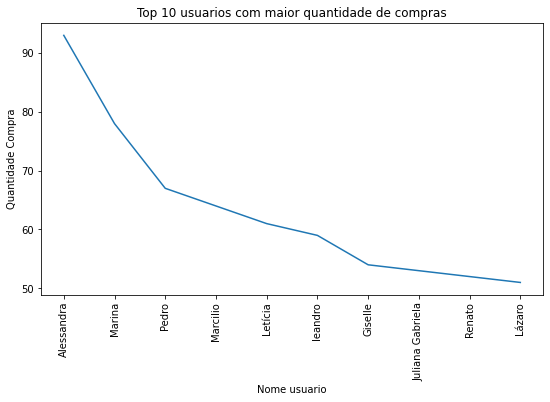

In [117]:
top10_usuarios.index = np.arange(10)

plt.figure(figsize=(9, 5))
plt.xticks(top10_usuarios.index, top10_usuarios_name, rotation='vertical')
plt.ylabel('Quantidade Compra')
plt.xlabel('Nome usuario')
plt.title('Top 10 usuarios com maior quantidade de compras')
plt.plot(top10_usuarios)
plt.savefig('./images/top10-usuarios-maior-qtd-compras.png')  
plt.show()

### Top 10 usuarios que mais gastaram com compras

In [13]:
def get_usuario_total_compra(usuario):
    return dataset.groupby('usuario').get_group(usuario)['valor_compra'].sum()

In [14]:
usuarios_total_compra = {'usuario': [], 'nome': [], 'filial': [], 'total_compra': []}
usuarios = dataset['usuario'].unique()

for usuario in usuarios:
    usuarios_total_compra['usuario'].append(usuario)
    usuarios_total_compra['nome'].append(dataset.groupby('usuario').get_group(usuario)['nome'].unique()[0])
    usuarios_total_compra['filial'].append(dataset.groupby('usuario').get_group(usuario)['Filial'].unique()[0])
    usuarios_total_compra['total_compra'].append(get_usuario_total_compra(usuario))

usuarios_total_compra = pd.DataFrame(usuarios_total_compra)

In [119]:
top10_usuarios = usuarios_total_compra.sort_values(['total_compra'], ascending=False).head(10)
top10_usuarios.index = np.arange(10)
top10_usuarios_nomes = top10_usuarios['nome'].values
top10_usuarios

,usuario,nome,filial,total_compra
0,83270,LEONARDO,Loja Manoa,15575.05
1,478139,Mariza,Loja Armando Mendes,9977.21
2,623984,MARIA,Loja Manoa,9089.10
3,272197,Felipe,Loja Manoa,7855.34
4,12567,Ruben,Loja Manoa,7827.01
5,2906,Nathalia,Loja Manoa,7786.23
6,462735,Roberta,Loja Manoa,7373.73
7,546900,Alexandre,Loja Cachoerinha,6904.38
8,796822,Thiago,Loja Manoa,6740.62
9,756859,Bruno,Loja Manoa,6707.40


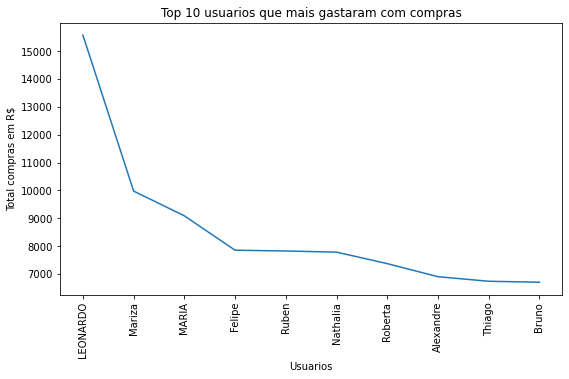

In [120]:
plt.figure(figsize=(9, 5))
plt.xticks(top10_usuarios.index, top10_usuarios_nomes, rotation=90)
plt.yticks(np.arange(0,top10_usuarios['total_compra'].max(), step=1000))
plt.xlabel('Usuarios')
plt.ylabel('Total compras em R$')
plt.title('Top 10 usuarios que mais gastaram com compras')
plt.plot(top10_usuarios['total_compra'])
plt.savefig('./images/top10-usuarios-maior-gasto-compras.png')  
plt.show()

### Top 5 usuarios que mais gastaram com compras por filial

In [17]:
def get_top5_filial(filial):
    top5 = usuarios_total_compra.groupby('filial').get_group(filial).sort_values(['total_compra'], ascending=False).head(5)
    top5.index = np.arange(1,6)
    return top5

### Top 5 usuários que mais gastaram - Filial Manoa

In [18]:
manoa = get_top5_filial('Loja Manoa')
manoa

,usuario,nome,filial,total_compra
1,83270,LEONARDO,Loja Manoa,15575.05
2,623984,MARIA,Loja Manoa,9089.10
3,272197,Felipe,Loja Manoa,7855.34
4,12567,Ruben,Loja Manoa,7827.01
5,2906,Nathalia,Loja Manoa,7786.23


### Top 5 usuários que mais gastaram - Armando Mendes

In [19]:
armando_mendes = get_top5_filial('Loja Armando Mendes')
armando_mendes

,usuario,nome,filial,total_compra
1,478139,Mariza,Loja Armando Mendes,9977.21
2,754242,Raquel,Loja Armando Mendes,4951.29
3,666544,Gaby,Loja Armando Mendes,3894.40
4,746615,Cláudia,Loja Armando Mendes,3782.66
5,69199,Renato,Loja Armando Mendes,3575.49


### Top 5 usuários que mais gastaram - filial Cachoeirinha

In [20]:
cachoeirinha = get_top5_filial('Loja Cachoerinha')
cachoeirinha

,usuario,nome,filial,total_compra
1,546900,Alexandre,Loja Cachoerinha,6904.38
2,842680,Giselle,Loja Cachoerinha,5070.50
3,845784,Irineu,Loja Cachoerinha,4812.18
4,653139,Marcela,Loja Cachoerinha,4810.76
5,588088,cynthia,Loja Cachoerinha,4774.25


### Quantidade de compras por filial

In [21]:
dataset.groupby('Filial').size().sort_values()

Filial
Loja Armando Mendes    2699
Loja Manoa             4632
Loja Cachoerinha       4658
dtype: int64

### Valor total de compras

R$1,394,765.45

In [22]:
dataset['valor_compra'].sum()

1394765.45

### Valor total de compras por filial

Armando Mendes = R$153,910.32

 Manoa= R$773,495.84

Cachoeirinha = R$ 467,359.29

In [23]:
filiais = dataset['Filial'].unique()

def get_total_venda_filial(filial):
    return dataset.groupby('Filial').get_group(filial)['valor_compra'].sum()

venda_filiais = [get_total_venda_filial(filial) for filial in filiais]
venda_filiais

[153910.32, 773495.8400000001, 467359.29000000004]

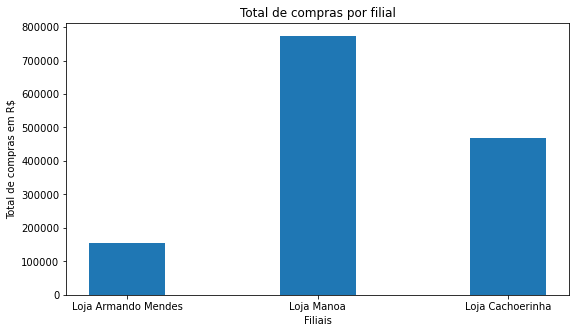

In [121]:
plt.figure(figsize=(9, 5))
plt.bar(filiais, venda_filiais, width=0.4)
plt.xlabel('Filiais')
plt.ylabel('Total de compras em R$')
plt.title('Total de compras por filial')
plt.savefig('./images/total-compras-por-filial.png')  
plt.show()

## Análise de dados por período

In [25]:
data_inferior = dataset['data_compra'] >= '2019-01-01'
data_superior = dataset['data_compra'] <= '2019-01-31'
dataset_janeiro = dataset[data_inferior&data_superior].sort_values(['data_compra'])
total_janeiro = dataset_janeiro['valor_compra'].sum()
dataset_janeiro

,num_compra,usuario,nome,dados,Filial,data_compra,valor_compra,Imposto,Informado sobre imposto?
2521,24692669,267486,Hiroshi,12,Loja Armando Mendes,2019-01-01,14.35,0.29,Sim
7562,24687267,659952,Gabriela,12,Loja Cachoerinha,2019-01-01,45.42,0.92,Sim
1590,24698302,153646,Matheus,12,Loja Manoa,2019-01-01,62.66,1.26,Sim
11166,24991554,925344,MARINA,12,Loja Cachoerinha,2019-01-01,162.31,3.27,Sim
7691,24994247,663524,Bianca Baião B.,12,Loja Manoa,2019-01-01,171.56,3.46,Sim
...,...,...,...,...,...,...,...,...,...
3735,26242877,465089,Fabiana,12,Loja Manoa,2019-01-31,15.42,0.31,Sim
8697,26294216,703346,leandro,12,Loja Manoa,2019-01-31,26.99,0.54,Sim
9939,26283029,796822,Thiago,12,Loja Manoa,2019-01-31,48.37,0.98,Sim
232,26282157,12567,Ruben,12,Loja Manoa,2019-01-31,43.06,0.87,Não informado


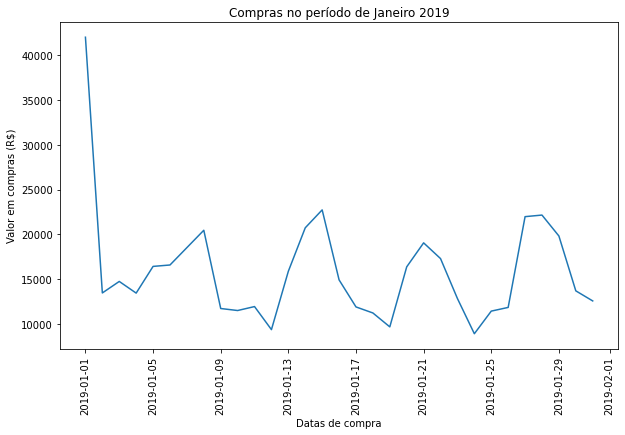

In [122]:
dataset_janeiro_agrupado = dataset_janeiro.groupby('data_compra').sum()
labels = dataset_janeiro_agrupado.index.to_frame()
labels['data_compra'] = labels['data_compra']
labels = labels.astype({'data_compra': 'string'})
labels_number = np.arange(0, len(labels), step=1)

plt.figure(figsize=(10, 6))
plt.xticks(rotation='vertical')
plt.xlabel('Datas de compra')
plt.ylabel('Valor em compras (R$)')
plt.title('Compras no período de Janeiro 2019')
plt.plot(dataset_janeiro_agrupado['valor_compra'])
plt.savefig('./images/compras-no-periodo-janeiro.png')  

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [93]:
data_inferior = dataset['data_compra'] >= '2019-05-01'
data_superior = dataset['data_compra'] <= '2019-05-31'
dataset_maio = dataset[data_inferior&data_superior].sort_values(['data_compra'])
total_maio = dataset_maio['valor_compra'].sum()
dataset_maio

,num_compra,usuario,nome,dados,Filial,data_compra,valor_compra,Imposto,Informado sobre imposto?
11999,21878095,996603,RICARDO GATTAS,12,Loja Armando Mendes,2019-05-01,8.27,0.17,Sim
4880,21872844,567349,Olivia,12,Loja Cachoerinha,2019-05-01,59.88,1.21,Sim
4899,21854670,568849,Marcilio,12,Loja Armando Mendes,2019-05-01,10.01,0.20,Sim
4926,22186987,568849,Marcilio,12,Loja Armando Mendes,2019-05-01,33.76,0.68,Sim
4933,22159840,568849,Marcilio,12,Loja Armando Mendes,2019-05-01,22.40,0.45,Sim
...,...,...,...,...,...,...,...,...,...
10451,23273543,845784,Irineu,12,Loja Cachoerinha,2019-05-31,106.75,2.15,Não informado
163,23294984,8899,Felippe,12,Loja Manoa,2019-05-31,105.65,2.13,Não informado
9049,23268087,715658,Stephanie,12,Loja Manoa,2019-05-31,32.76,0.66,Sim
9891,23272665,795818,Rafael,12,Loja Cachoerinha,2019-05-31,58.16,1.17,Sim


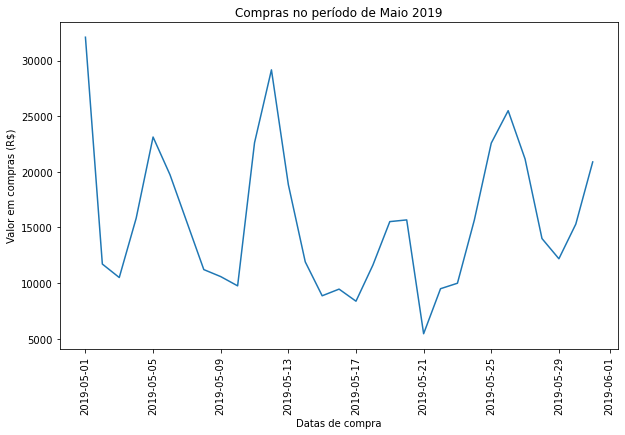

In [128]:
dataset_maio_agrupado = dataset_maio.groupby('data_compra').sum()
labels = dataset_maio_agrupado.index.to_frame()
labels['data_compra'] = labels['data_compra']
labels = labels.astype({'data_compra': 'string'})
labels_number = np.arange(0, len(labels), step=1)

plt.figure(figsize=(10, 6))
plt.xticks(rotation='vertical')
plt.xlabel('Datas de compra')
plt.ylabel('Valor em compras (R$)')
plt.title('Compras no período de Maio 2019')
plt.plot(dataset_maio_agrupado['valor_compra'])
plt.savefig('./images/compras-no-periodo-maio.png')
plt.show()

In [96]:
data_inferior = dataset['data_compra'] >= '2019-06-01'
data_superior = dataset['data_compra'] <= '2019-06-30'
dataset[data_inferior&data_superior].sort_values(['data_compra'])
dataset_junho = dataset[data_inferior&data_superior].sort_values(['data_compra'])
total_junho = dataset_junho['valor_compra'].sum()
dataset_junho

,num_compra,usuario,nome,dados,Filial,data_compra,valor_compra,Imposto,Informado sobre imposto?
1,23600787,295,Daniel,12,Loja Manoa,2019-06-01,95.96,1.94,Sim
1107,23613203,95502,Karina,12,Loja Manoa,2019-06-01,61.88,1.25,Sim
8986,23337724,713448,Irineu,12,Loja Cachoerinha,2019-06-01,293.80,5.92,Sim
1080,23589508,94696,sergio,12,Loja Cachoerinha,2019-06-01,8.40,0.17,Sim
1079,23616230,94454,Wilken,12,Loja Cachoerinha,2019-06-01,18.56,0.37,Sim
...,...,...,...,...,...,...,...,...,...
4843,24669765,566144,Thiago,12,Loja Manoa,2019-06-30,66.34,1.34,Sim
8466,24649867,689675,Bernardo,12,Loja Manoa,2019-06-30,67.51,1.36,Sim
666,24646768,57941,Gustavo,12,Loja Manoa,2019-06-30,304.60,6.14,Não informado
4550,24649726,541169,Mário,12,Loja Manoa,2019-06-30,692.87,13.97,Não informado


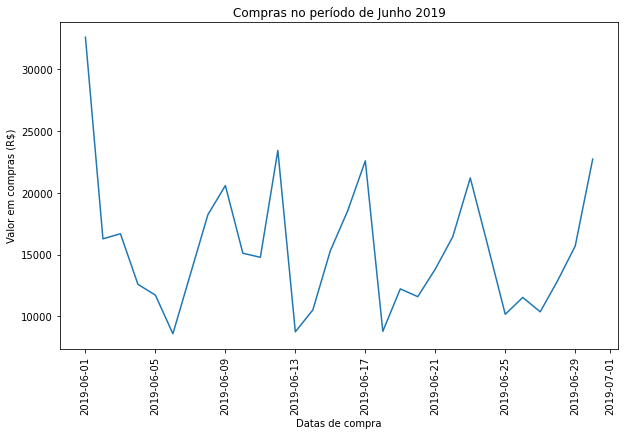

In [127]:
dataset_junho_agrupado = dataset_junho.groupby('data_compra').sum()
labels = dataset_junho_agrupado.index.to_frame()
labels['data_compra'] = labels['data_compra']
labels = labels.astype({'data_compra': 'string'})
labels_number = np.arange(0, len(labels), step=1)

plt.figure(figsize=(10, 6))
plt.xticks(rotation='vertical')
plt.xlabel('Datas de compra')
plt.ylabel('Valor em compras (R$)')
plt.title('Compras no período de Junho 2019')
plt.plot(dataset_junho_agrupado['valor_compra'])
plt.savefig('./images/compras-no-periodo-junho.png')  
plt.show()